In [1]:
#transfer learning model using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4
#resource: https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub

from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import PIL.Image as Image
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
#import zipfile
#import cv2
#from google.colab import drive
#drive.mount('/content/drive')
#print("success")
#print(os.getcwd())

In [0]:
with zipfile.ZipFile("./drive/My Drive/freshest_train_and_test.zip", 'r') as zip_ref:
    zip_ref.extractall("./dataset/")

In [2]:
dim = (224, 224)
train_data_path = "./dataset/train_images"
engine_images = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
training_images = engine_images.flow_from_directory(str(train_data_path), target_size=dim)

test_data_path = "./dataset/test_images"
engine_images = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
testing_images = engine_images.flow_from_directory(str(test_data_path), target_size=dim)

Found 25974 images belonging to 120 classes.
Found 2899 images belonging to 120 classes.


In [3]:
mobilenet = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
                                                                                     input_shape=(224,224,3))
mobilenet.trainable = False #dont train the pretrained model

In [4]:
print("Experiment #3\noptimizer: Adagrad, learning rate=0.01, loss function: Categorical Crossentropy, batch size: 32, epochs=10\n")
model = tf.keras.Sequential([mobilenet, layers.Dense(training_images.num_classes, activation='softmax')])
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
num_batches = np.ceil(training_images.samples/32.0)
history = model.fit(training_images, epochs=10, steps_per_epoch=num_batches, validation_data=testing_images)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Experiment #3 Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Experiment #3 Loss Function per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

#model.save("./drive/My Drive/dog_model_april_2", save_format='tf')

Experiment #3
optimizer: Adagrad, learning rate=0.01, loss function: Categorical Crossentropy, batch size: 32, epochs=10

Train for 812.0 steps, validate for 91 steps
Epoch 1/10
812/812 [==============================] - 118s 145ms/step - loss: 1.6254 - accuracy: 0.6622 - val_loss: 0.7464 - val_accuracy: 0.8041- ETA: 14s - loss: 1.7339 - accuracy: 0.  - ETA: 2s - loss: 1.642 - ETA: 0s - loss: 1.6291 - accuracy: 0.
Epoch 2/10
812/812 [==============================] - 111s 136ms/step - loss: 0.7110 - accuracy: 0.8137 - val_loss: 0.5994 - val_accuracy: 0.8252
Epoch 3/10
812/812 [==============================] - 113s 139ms/step - loss: 0.5930 - accuracy: 0.8363 - val_loss: 0.5462 - val_accuracy: 0.8352
Epoch 4/10
812/812 [==============================] - 104s 128ms/step - loss: 0.5317 - accuracy: 0.8518 - val_loss: 0.5195 - val_accuracy: 0.8390
Epoch 5/10
812/812 [==============================] - 107s 132ms/step - loss: 0.4903 - accuracy: 0.8635 - val_loss: 0.5027 - val_accuracy: 0.833

KeyError: 'acc'

In [5]:
#use this to save and load models
#model.save("./models/adagrad-april-3", save_format='tf')
model = tf.keras.models.load_model("./models/adagrad-april-3")

labels = sorted(training_images.class_indices.items(), key=lambda pair:pair[1])
labels = np.array([label.title() for label, val in labels])

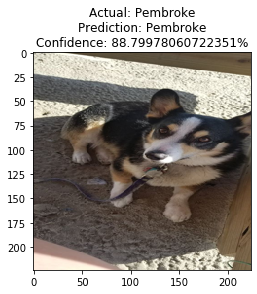

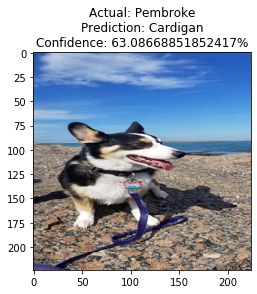

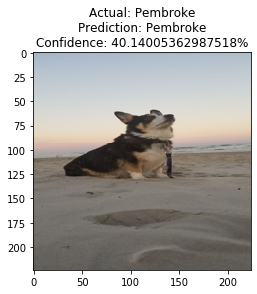

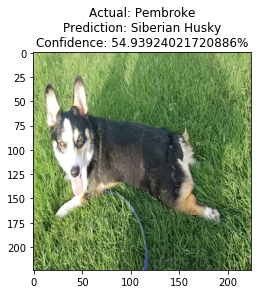

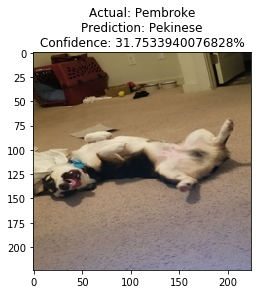

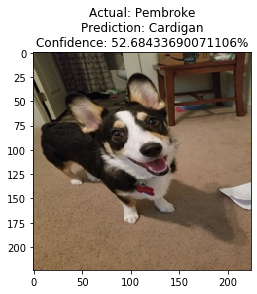

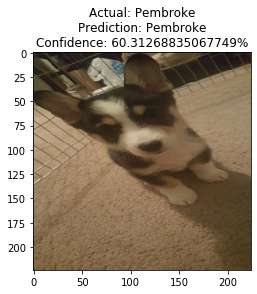

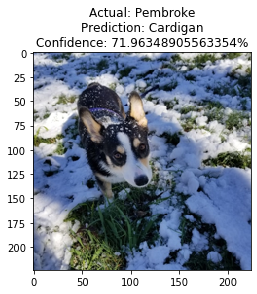

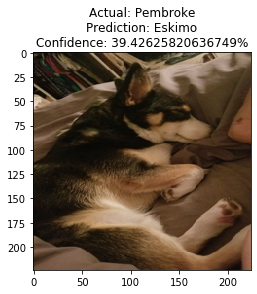

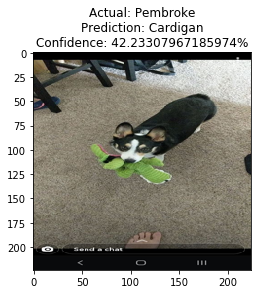

In [6]:
labels = sorted(training_images.class_indices.items(), key=lambda pair:pair[1])
labels = np.array([label.title() for label, val in labels])

plt.figure()
test_image=Image.open("./withers/withers1.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pembroke"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./withers/withers2.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pembroke"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./withers/withers3.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pembroke"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./withers/withers4.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pembroke"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./withers/withers5.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pembroke"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./withers/withers6.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pembroke"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./withers/withers7.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pembroke"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./withers/withers8.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pembroke"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./withers/withers9.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pembroke"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")

plt.figure()
test_image=Image.open("./withers/withers10.jpg").resize(dim)
test_image = np.array(test_image)/255.0
outputs = model.predict(test_image[np.newaxis, ...])
prediction = labels[np.argmax(outputs[0], axis=-1)]
plt.imshow(test_image)
_=plt.title("Actual: Pembroke"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%")



In [6]:
#go through test images, determine accuracy per breed and most common mistakes for each breed
from collections import Counter
#print(labels)
DIR = "./dataset/test_images/"
breed_accuracy_list = []
total_correct_count = 0
total_incorrect_count = 0
#total_correct_confidence = 0
#total_incorrect_confidence = 0
for label in labels:
    breed_dir = DIR + label
    breed_test_image_count = 0
    breed_correct_count = 0
    #cnt = Counter()
    for filename in os.listdir(breed_dir):
        #plt.figure()
        breed_test_image_count +=1
        test_image=Image.open(breed_dir + "/" + filename).resize(dim)
        test_image = np.array(test_image)/255.0
        outputs = model.predict(test_image[np.newaxis, ...])
        index1 = np.argmax(outputs[0],axis=-1)
        prediction1 = labels[index1]
        confidence1 = str(outputs[0][index1]*100)+"%"
        #outputs[0][index1] = 0
        #index2 = np.argmax(outputs[0],axis=-1)
        #prediction2 = labels[index2]
        #confidence2 = str(outputs[0][index2]*100)+"%"
        #test_image.close()
        if prediction1 == label:
            breed_correct_count +=1
            total_correct_count +=1
            #total_correct_confidence += (outputs[0][index1]*100)
        else:
            total_incorrect_count +=1
            #total_incorrect_confidence += (outputs[0][index1]*100)
            #outputs[0][index1] = 0
            #index2 = np.argmax(outputs[0],axis=-1)
            #prediction2 = labels[index2]
            #confidence2 = str(outputs[0][index2]*100)+"%"
            #cnt[prediction1] +=1
    breed_accuracy = breed_correct_count / breed_test_image_count
    breed_accuracy_list.append(breed_accuracy)
    print("Breed = " + label + ", accuracy = " + str(breed_accuracy))
    #print("Most commonly confused breeds = " + str(cnt.most_common()) + "\n")
#mean_correct_confidence = total_correct_confidence / total_correct_count
#mean_incorrect_confidence = total_incorrect_confidence / total_incorrect_count
#print("Mean confidence when correct = " + str(mean_correct_confidence) + "\nMean confidence when incorrect = " + str(mean_incorrect_confidence))
        #plt.imshow(test_image)
        #_=plt.title("Actual: Basset"+"\nPrediction: " + prediction.title()+"\nConfidence: "+str(outputs[0][np.argmax(outputs[0], axis=-1)]*100)+"%" + prediction2.title())
        #_=plt.title("Actual: Basset"+"\nPrediction1: " + prediction1.title()+"\nConfidence1: "+confidence1 + "\nPrediction2: " + prediction2.title() + "\nConfidence2: " + confidence2)

Breed = Affenpinscher, accuracy = 0.782608695652174
Breed = Afghan Hound, accuracy = 0.9629629629629629
Breed = African Hunting Dog, accuracy = 1.0
Breed = Airedale, accuracy = 0.88
Breed = American Staffordshire Terrier, accuracy = 0.391304347826087
Breed = Appenzeller, accuracy = 0.625
Breed = Australian Terrier, accuracy = 0.6666666666666666
Breed = Basenji, accuracy = 0.9090909090909091
Breed = Basset, accuracy = 0.9583333333333334
Breed = Beagle, accuracy = 0.7083333333333334
Breed = Bedlington Terrier, accuracy = 1.0
Breed = Bernese Mountain, accuracy = 0.9615384615384616
Breed = Black And Tan Coonhound, accuracy = 0.9629629629629629
Breed = Blenheim Cavalier King Charles Spaniel, accuracy = 0.9230769230769231
Breed = Bloodhound, accuracy = 0.84
Breed = Bluetick, accuracy = 0.9166666666666666
Breed = Border Collie, accuracy = 0.7916666666666666
Breed = Border Terrier, accuracy = 0.84
Breed = Borzoi, accuracy = 0.9166666666666666
Breed = Boston Bull, accuracy = 0.96
Breed = Bouvie

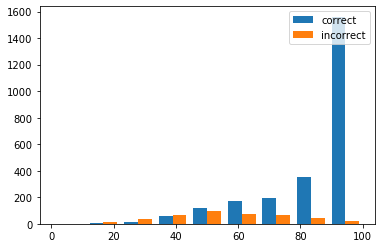

In [8]:
#let's chart confidence (10 buckets: 0-10%, 10-20%, 20-30%, etc.)
#color coded - red is incorrect, blue is correct
#print(labels)
DIR = "./dataset/test_images/"
correct_guess_confidences = []
incorrect_guess_confidences = []
#new_labels = labels[80]:
for label in labels:
    breed_dir = DIR + label
    for filename in os.listdir(breed_dir):
        test_image=Image.open(breed_dir + "/" + filename).resize(dim)
        test_image = np.array(test_image)/255.0
        outputs = model.predict(test_image[np.newaxis, ...])
        index = np.argmax(outputs[0],axis=-1)
        prediction = labels[index]
        confidence = outputs[0][index]*100
        if prediction == label:
            correct_guess_confidences.append(confidence)
        else:
            incorrect_guess_confidences.append(confidence)
bins = np.linspace(0,100,10)
plt.hist([correct_guess_confidences, incorrect_guess_confidences], bins, label=['correct', 'incorrect'])
plt.legend(loc='upper right')
plt.show()

   

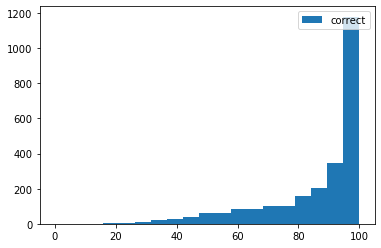

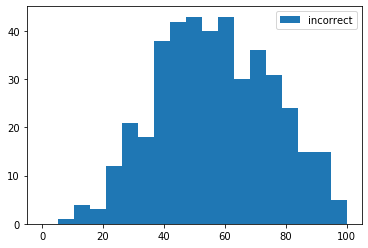

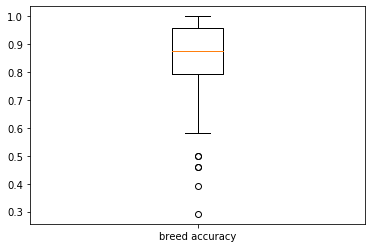

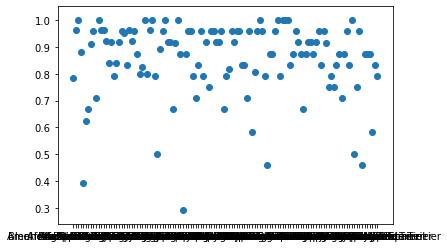

In [19]:
bins = np.linspace(0,100,20)
#plt.hist([correct_guess_confidences, incorrect_guess_confidences], bins, label=['correct', 'incorrect'])
#plt.legend(loc='upper right')
#plt.show()

plt.hist([correct_guess_confidences], bins, label=['correct'])
plt.legend(loc='upper right')
plt.show()

plt.hist([incorrect_guess_confidences], bins, label=['incorrect'])
plt.legend(loc='upper right')
plt.show()

x = plt.boxplot([breed_accuracy_list],vert=True,labels=['breed accuracy'], showfliers=True)
plt.show()

plt.scatter(labels, breed_accuracy_list)
plt.show()
#print(correct_guess_confidences)
#print(incorrect_guess_confidences)